<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/Binarna_Klasifikacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


891


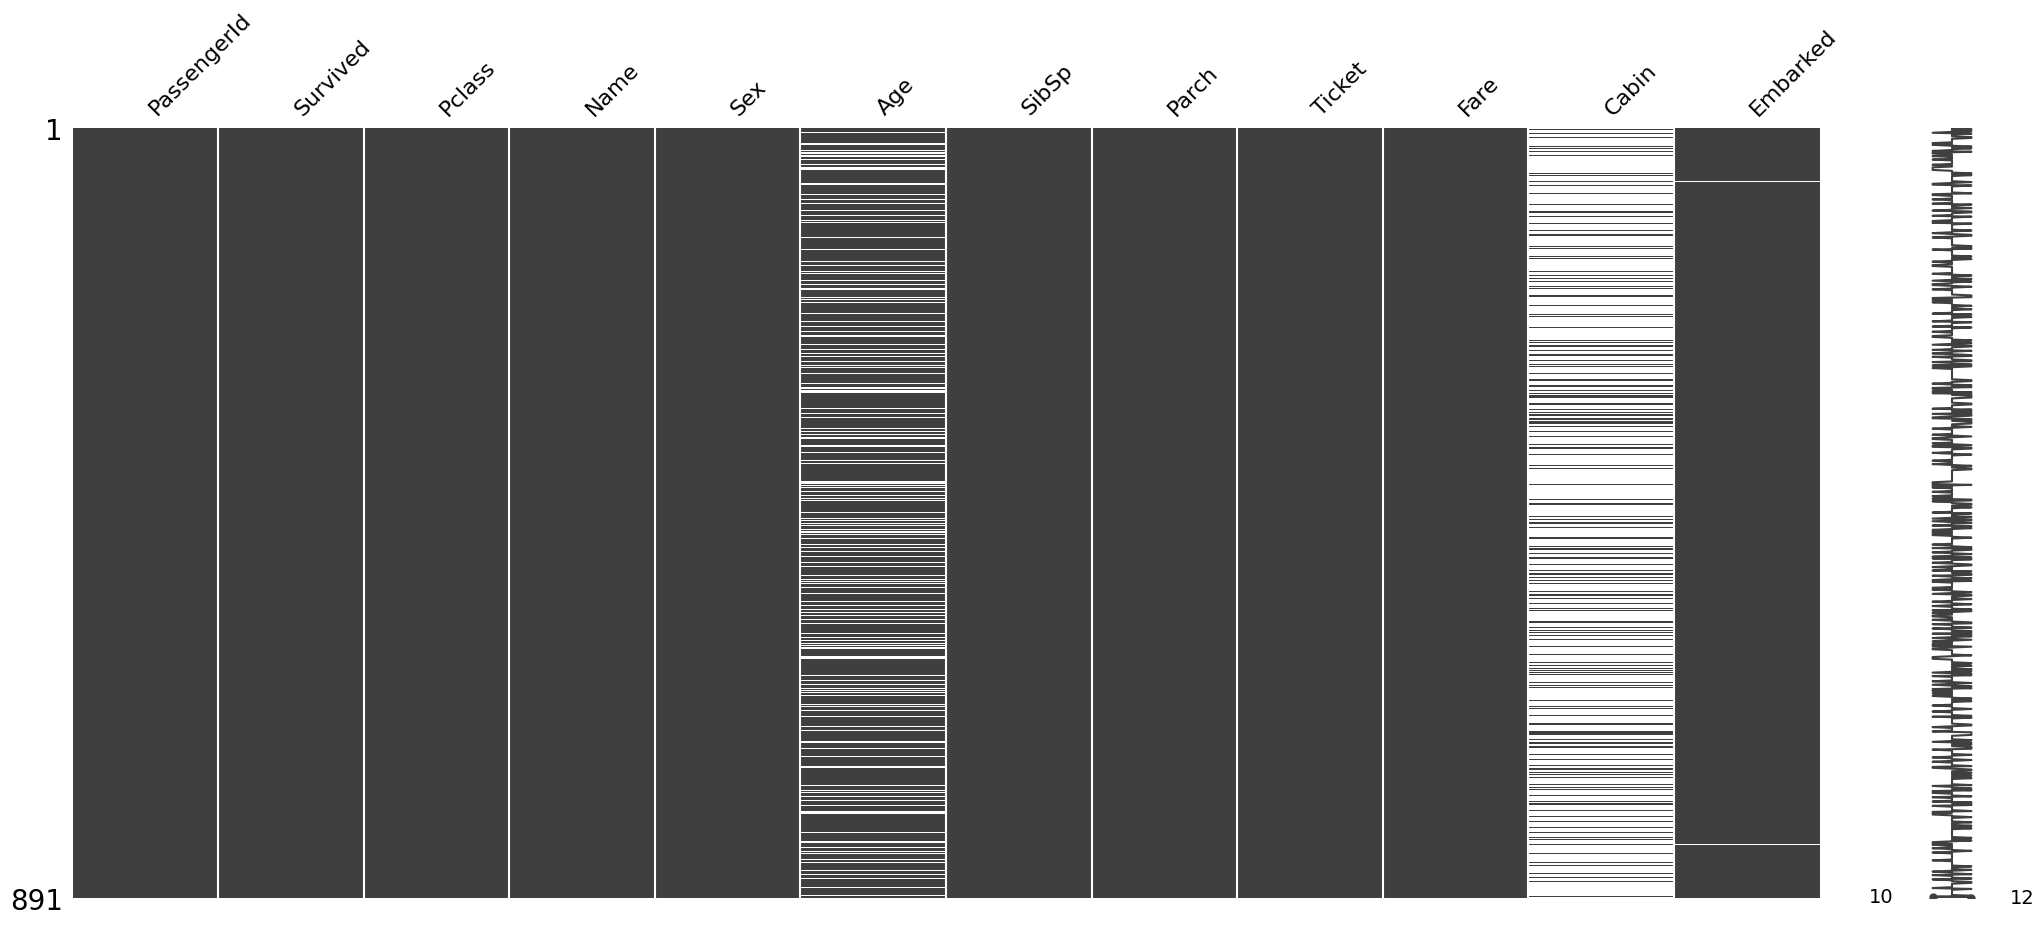

In [ ]:
import pandas as pd
import missingno as msno
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
display(df.head())
msno.matrix(df)
#display(df.head(30))
print(len(df))

In [ ]:
df[["Fare"]].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: >

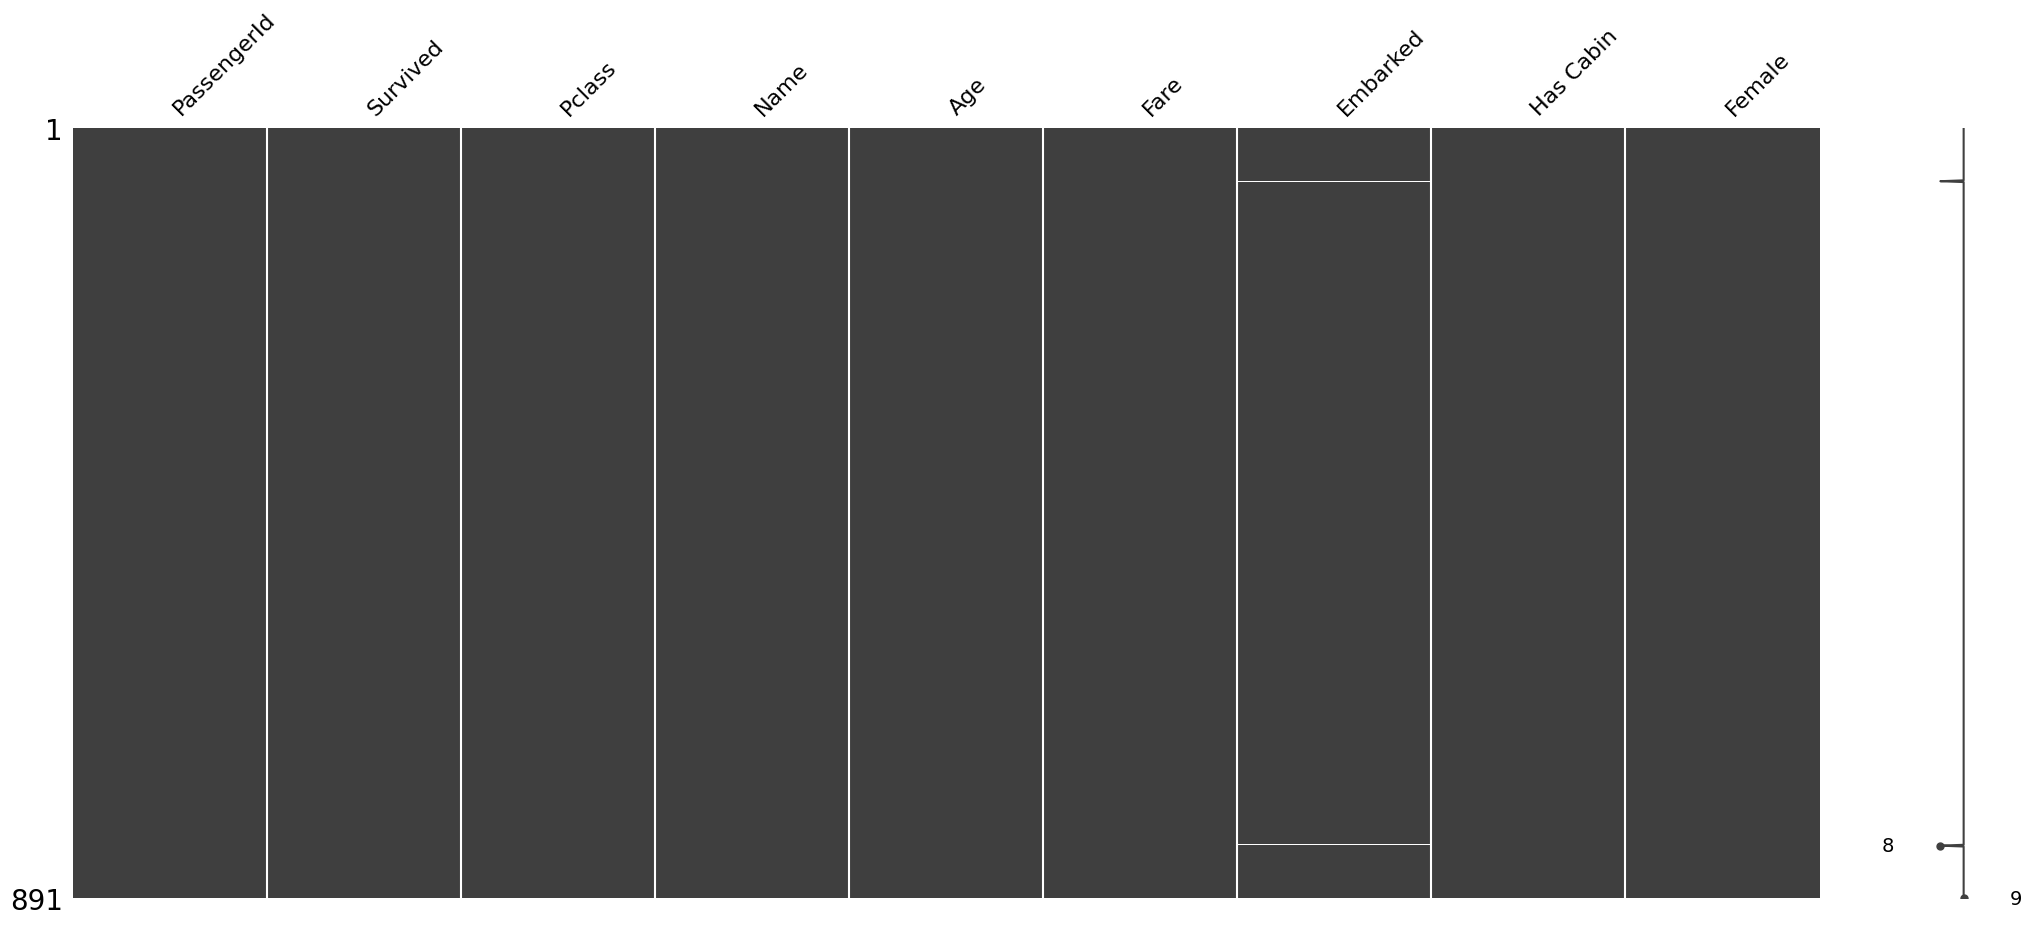

In [ ]:
import numpy as np

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Has Cabin'] = df['Cabin'].isna().apply(lambda x: not x)
df['Female'] = df['Sex'] == "female"
df.drop(columns=["Cabin", "Sex", "SibSp", "Parch", "Ticket"], inplace=True)
msno.matrix(df)


In [ ]:
display(df.head())
df.corr()['Survived']

,PassengerId,Survived,Pclass,Name,Age,Fare,Embarked,Has Cabin,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,S,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C,True,True
2,3,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,S,True,True
4,5,0,3,"Allen, Mr. William Henry",35.0,8.0500,S,False,False


<ipython-input-47-0743437cf587>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.064910
Fare           0.257307
Has Cabin      0.316912
Female         0.543351
Name: Survived, dtype: float64

In [ ]:
df = df.drop(columns=['Age', 'PassengerId'])
df.head(10)

,Survived,Pclass,Name,Fare,Embarked,Has Cabin,Female
0,0,3,"Braund, Mr. Owen Harris",7.2500,S,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,C,True,True
2,1,3,"Heikkinen, Miss. Laina",7.9250,S,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,S,True,True
4,0,3,"Allen, Mr. William Henry",8.0500,S,False,False
5,0,3,"Moran, Mr. James",8.4583,Q,False,False
6,0,1,"McCarthy, Mr. Timothy J",51.8625,S,True,False
7,0,3,"Palsson, Master. Gosta Leonard",21.0750,S,False,False
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",11.1333,S,False,True
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",30.0708,C,False,True


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression()

dataset = df[['Pclass', 'Fare', 'Has Cabin', 'Female', 'Survived']]
dataset.head()

train, test = train_test_split(dataset, test_size=0.2, random_state=42)
model.fit(X=train[['Pclass', 'Fare', 'Has Cabin', 'Female']], y=train['Survived'])
y_pred = model.predict(X=test[['Pclass', 'Fare', 'Has Cabin', 'Female']])
y_true = test[['Survived']]

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X=train[['Pclass', 'Fare', 'Has Cabin', 'Female']], y=train['Survived'])
y_pred = dummy.predict(X=test[['Pclass', 'Fare', 'Has Cabin', 'Female']])

y_true = test[['Survived']]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")


model = KNeighborsClassifier(n_neighbors=11)

dataset = df[['Pclass', 'Fare', 'Has Cabin', 'Female', 'Survived']]
dataset.head()



train, test = train_test_split(dataset, test_size=0.2, random_state=42)

X = train[['Pclass', 'Fare', 'Has Cabin', 'Female']]
y = train['Survived']
# skaliramo X prekom z-score
X = scaler.fit_transform(X)

model.fit(X, y)
y_pred = model.predict(X=test[['Pclass', 'Fare', 'Has Cabin', 'Female']])
y_true = test[['Survived']]

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       105
           1       0.42      1.00      0.59        74

    accuracy                           0.42       179
   macro avg       0.71      0.51      0.31       179
weighted avg       0.76      0.42      0.27       179

